Train Shape: (76518, 38)
Test Shape: (51012, 37)
   id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           1

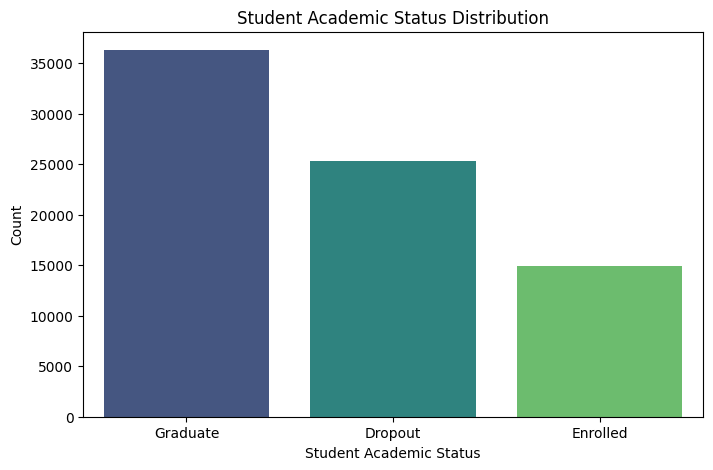

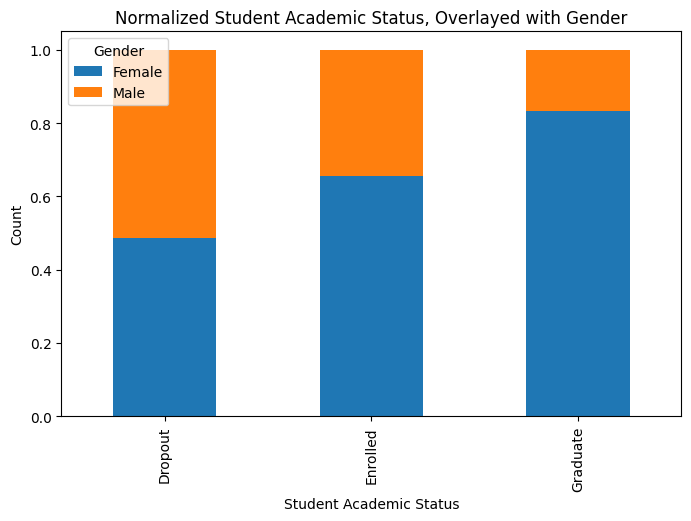

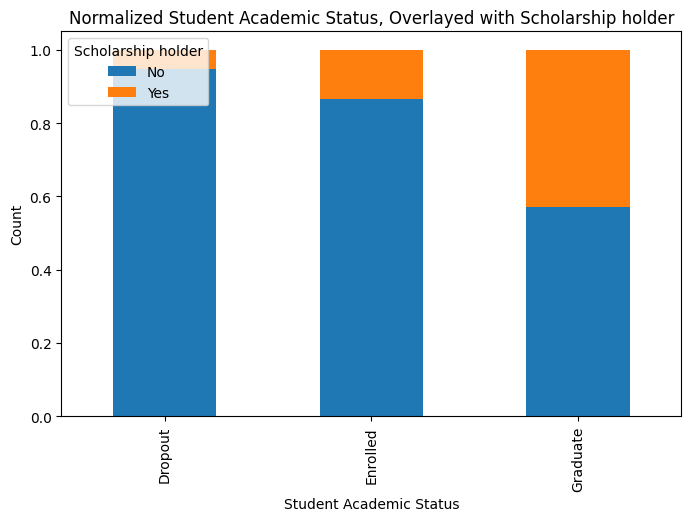

       Application order  Previous qualification (grade)  Admission grade  \
count       76518.000000                    76518.000000     76518.000000   
mean            1.644410                      132.378766       125.363971   
std             1.229645                       10.995328        12.562328   
min             0.000000                       95.000000        95.000000   
25%             1.000000                      125.000000       118.000000   
50%             1.000000                      133.100000       124.600000   
75%             2.000000                      140.000000       132.000000   
max             9.000000                      190.000000       190.000000   

       Age at enrollment  Curricular units 1st sem (credited)  \
count       76518.000000                         76518.000000   
mean           22.278653                             0.188871   
std             6.889241                             1.175296   
min            17.000000                      

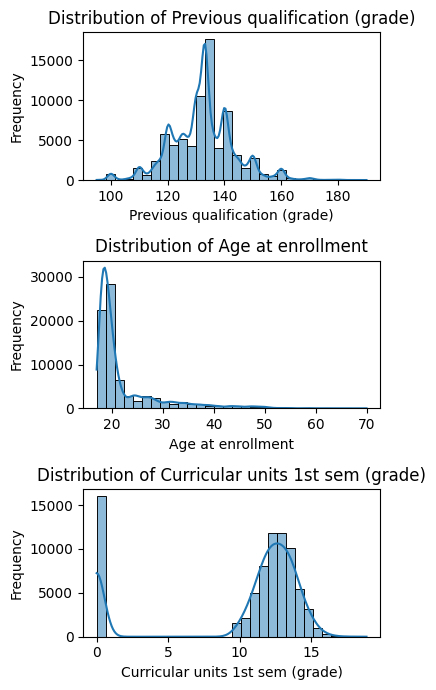

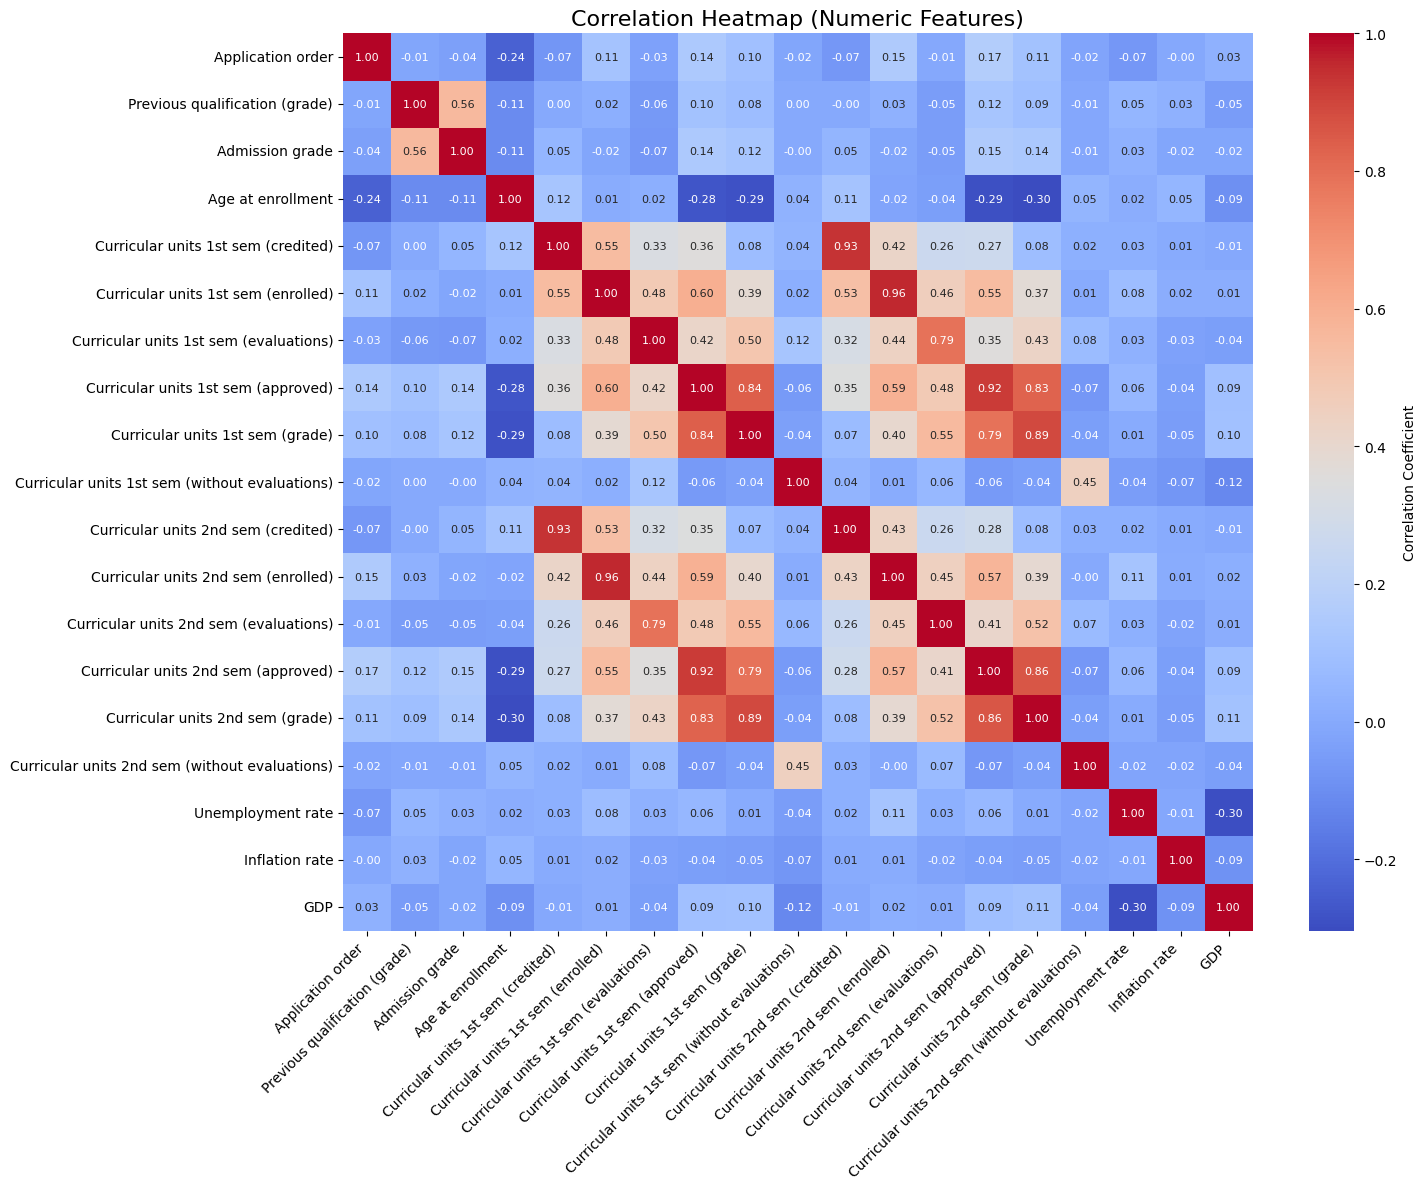


Variance Inflation Factor (VIF):
                                            Feature        VIF
5              Curricular units 1st sem (enrolled)  19.148141
11             Curricular units 2nd sem (enrolled)  16.851440
7              Curricular units 1st sem (approved)  12.419289
13             Curricular units 2nd sem (approved)  10.897342
4              Curricular units 1st sem (credited)   9.474387
14                Curricular units 2nd sem (grade)   8.311713
10             Curricular units 2nd sem (credited)   8.276544
8                 Curricular units 1st sem (grade)   7.692148
6           Curricular units 1st sem (evaluations)   3.209772
12          Curricular units 2nd sem (evaluations)   3.152025
2                                  Admission grade   1.528421
1                   Previous qualification (grade)   1.487570
9   Curricular units 1st sem (without evaluations)   1.300612
15  Curricular units 2nd sem (without evaluations)   1.261810
3                                Ag

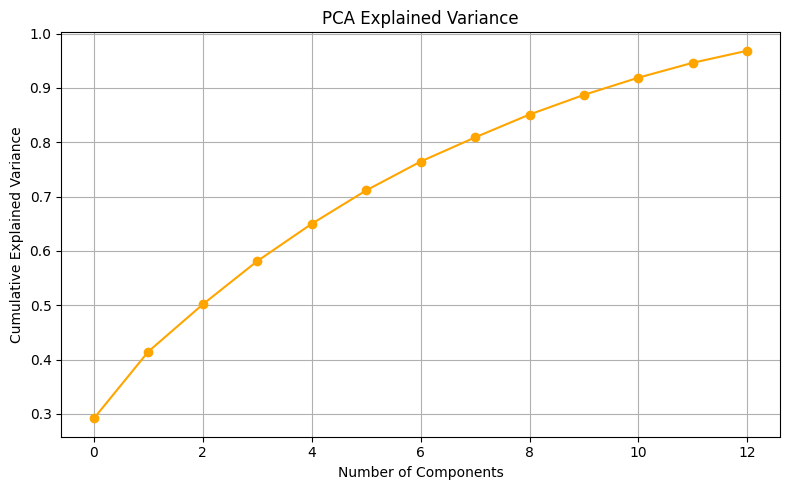


Logistic Regression Metrics:
Accuracy: 0.7864610559330893
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.87      0.79      0.83      5028
    Enrolled       0.60      0.43      0.50      3017
    Graduate       0.79      0.94      0.85      7259

    accuracy                           0.79     15304
   macro avg       0.75      0.72      0.73     15304
weighted avg       0.78      0.79      0.78     15304


Decision Tree Metrics:
Accuracy: 0.7104025091479352
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.74      0.76      0.75      5028
    Enrolled       0.44      0.43      0.43      3017
    Graduate       0.80      0.79      0.80      7259

    accuracy                           0.71     15304
   macro avg       0.66      0.66      0.66     15304
weighted avg       0.71      0.71      0.71     15304


Random Forest Metrics:
Accuracy: 0.7865263983272347
Classification Report:
  

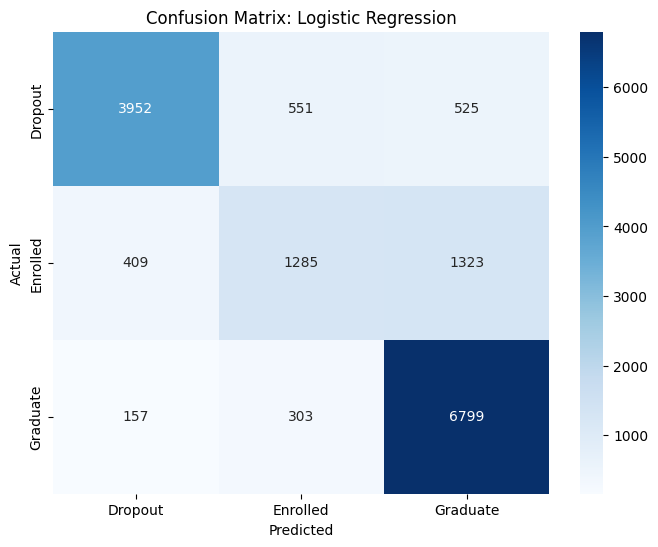

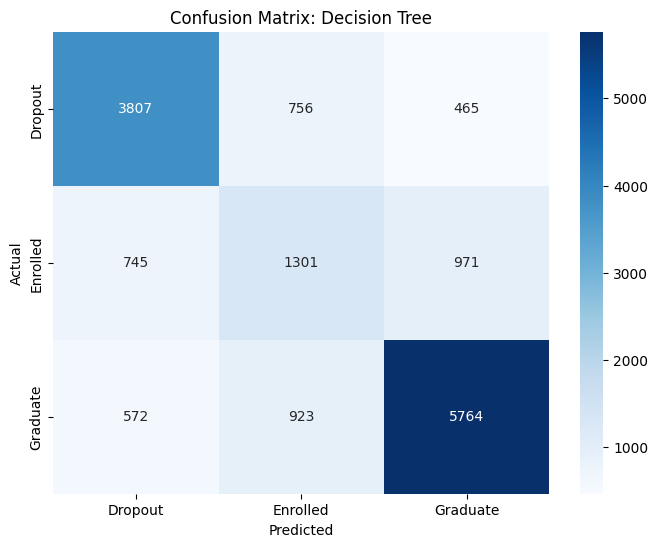

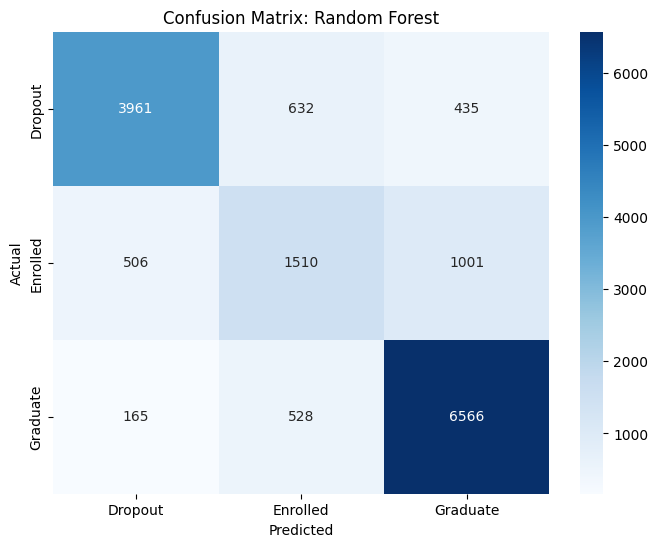

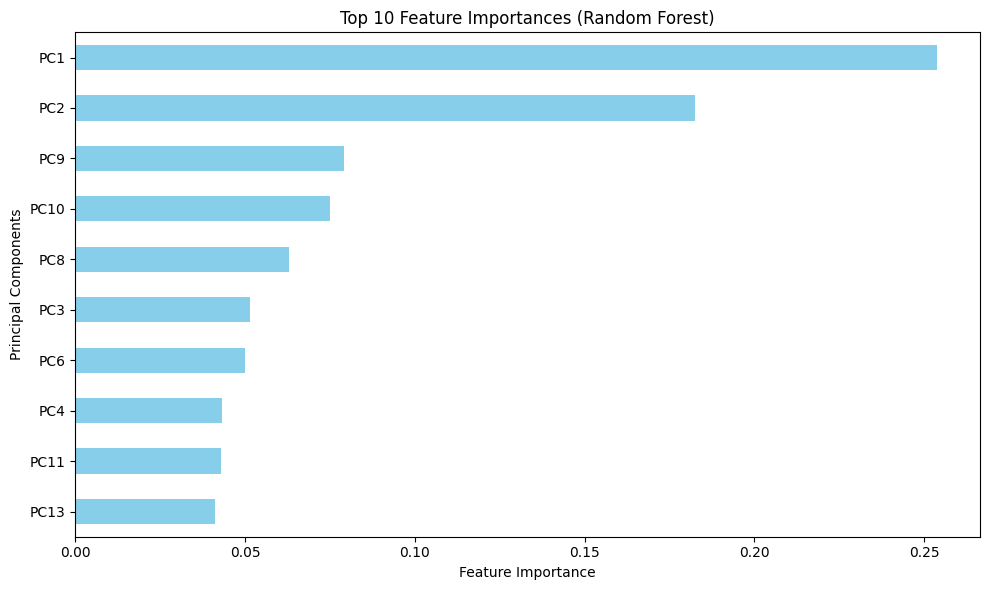


Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.786461
1        Decision Tree  0.710403
2        Random Forest  0.786526


C:\Users\cynth\AppData\Local\Temp\ipykernel_28512\991167821.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=model_comparison, palette="viridis")


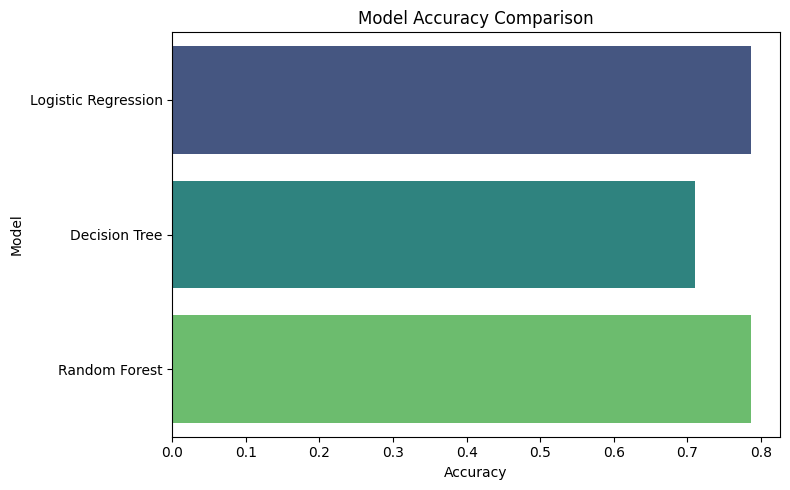

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.multiclass import OneVsRestClassifier

# ================================
# Step 1: Define Purpose
# ================================
# Objective: Predict student academic success (Graduate, Enrolled, Dropout) using classification models.

# Local file paths
train_path = '/Users/user/Desktop/USD/ADS 502/final project/playground-series-s4e6/train.csv'
test_path = '/Users/user/Desktop/USD/ADS 502/final project/playground-series-s4e6/test.csv'

# ================================
# Step 2: Obtain Data
# ================================
# Load datasets
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# Separate features and target variable
X = train.drop(columns=['Target'])
y = train['Target']

# ================================
# Step 3: Exploration, Data Cleaning, and Preparation
# ================================

#view some lines of the dataset
print(train.head())

#list all the features/columns
train.columns

#view the data types of each column:
print(train.dtypes)

#Check for any missing values
total_missing_values = train.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing_values)

# Manually specify categorical columns
categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 
                    "Mother's qualification", "Father's qualification",  "Mother's occupation", "Father's occupation", 'Displaced', 
                    'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Automatically identify numeric features
numeric_features = [col for col in X.columns if col not in categorical_features]

# Manually drop the 'id' column
numeric_features = [col for col in numeric_features if col != 'id']


# Explore categorical features

# View bar graph of target feature, Target
target_counts = train['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'count']
plt.figure(figsize=(8,5))
sns.barplot(data=target_counts, x='Target', y='count', hue='Target', palette='viridis', dodge=False, legend=False)
plt.xlabel("Student Academic Status")
plt.ylabel("Count")
plt.title("Student Academic Status Distribution")
plt.show()

# Normalized bar graph of student academic success, overlayed with gender
crosstab_01 = pd.crosstab(train['Target'], train['Gender'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
ax_norm = crosstab_norm.plot(kind='bar', stacked = True, figsize=(8,5))
plt.title("Normalized Student Academic Status, Overlayed with Gender")
plt.xlabel("Student Academic Status")
plt.ylabel("Count")
ax_norm.legend(["Female", "Male"], title="Gender", loc="upper left")
plt.show()

# Normalized bar graph of student academic success, overlayed with scholarship holder
crosstab_02 = pd.crosstab(train['Target'], train['Scholarship holder'])
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(1), axis = 0)
ax_norm2 = crosstab_norm2.plot(kind='bar', stacked = True, figsize=(8,5))
plt.title("Normalized Student Academic Status, Overlayed with Scholarship holder")
plt.xlabel("Student Academic Status")
plt.ylabel("Count")
ax_norm2.legend(["No", "Yes"], title="Scholarship holder", loc="upper left")
plt.show()


# Explore numerical features

# Summary statistics for numeric features
print(train[numeric_features].describe())

# Visualize distributions of select features using histograms
selected_columns = ['Previous qualification (grade)', 'Age at enrollment', 'Curricular units 1st sem (grade)']
fig, axes = plt.subplots(3, 1, figsize=(4, 7))
for i, col in enumerate(selected_columns):
    sns.histplot(train[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Normalize numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    X[numeric_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={'size': 8}
)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features
vif_data['VIF'] = [variance_inflation_factor(X[numeric_features].values, i) for i in range(len(numeric_features))]
print("\nVariance Inflation Factor (VIF):\n", vif_data.sort_values(by='VIF', ascending=False))

# ================================
# Step 4: Dimension Reduction with PCA
# ================================
# Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X[numeric_features])
print(f"Number of components after PCA: {pca.n_components_}")

# Visualize explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# Step 5: Model Implementation
# ================================
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression (Baseline Model)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)
y_pred_lr = ovr_classifier.predict(X_val)
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_val)
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_val)
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

# ================================
# Step 6: Model Performance Visualization
# ================================
# Confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=['Dropout', 'Enrolled', 'Graduate'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_val, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_val, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_val, y_pred_rf, "Random Forest")

# Feature importance for Random Forest
feature_importances = pd.Series(random_forest.feature_importances_, index=[f'PC{i+1}' for i in range(pca.n_components_)])
top_features = feature_importances.nlargest(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', title="Top 10 Feature Importances (Random Forest)", color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()

# ================================
# Step 7: Model Comparison
# ================================
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_val, y_pred_lr),
        accuracy_score(y_val, y_pred_dt),
        accuracy_score(y_val, y_pred_rf)
    ]
})
print("\nModel Comparison:\n", model_comparison)

# Display model comparison as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=model_comparison, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.tight_layout()
plt.show()